# Handwritten Character Recognition using CNN
CodeAlpha Machine Learning Internship – Task 3

This project aims to recognize handwritten digits using a Convolutional Neural Network (CNN).
The MNIST dataset is used, which contains grayscale images of handwritten digits (0–9).


Importing required libraries for numerical computation, visualization and deep learning.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout



### Load the MNIST Dataset
This cell loads the MNIST handwritten digits dataset using Keras.


Checking the shape of the dataset to understand the number of samples and image dimensions.
Each image is of size 28×28 pixels.


In [2]:
#Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Dataset Exploration (Analysis)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Training labels shape: (60000,)


Displaying sample handwritten digit images from the dataset.


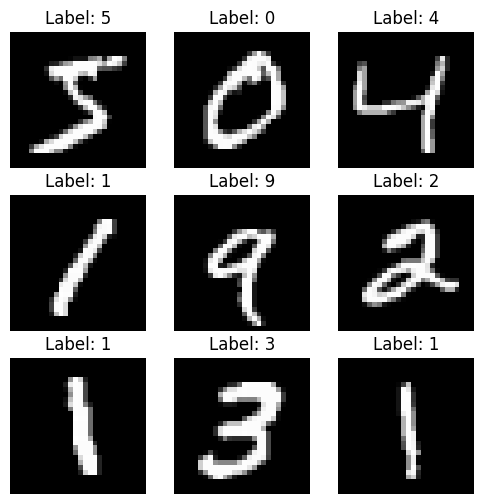

In [4]:
# Visualize Sample Images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


Normalizing pixel values and reshaping images for CNN input.
Labels are converted into one-hot encoded format.


In [5]:
#Data Preprocessing
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0



Creating a Convolutional Neural Network architecture for handwritten digit classification.


In [6]:
#Build CNN Model
model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

Compiling the CNN model using Adam optimizer and categorical cross-entropy loss.


In [7]:
#Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Training the CNN model on the training dataset.


In [8]:
# Convert y_train to one-hot encoded format
y_train_one_hot = to_categorical(y_train, num_classes=10)

#Train Model
history = model.fit(
    X_train, y_train_one_hot, # Use the one-hot encoded labels
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.8008 - loss: 0.6293 - val_accuracy: 0.9787 - val_loss: 0.0670
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.9676 - loss: 0.1101 - val_accuracy: 0.9872 - val_loss: 0.0481
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9766 - loss: 0.0790 - val_accuracy: 0.9887 - val_loss: 0.0408
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9816 - loss: 0.0644 - val_accuracy: 0.9898 - val_loss: 0.0335
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.9837 - loss: 0.0537 - val_accuracy: 0.9893 - val_loss: 0.0360
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.9866 - loss: 0.0446 - val_accuracy: 0.9902 - val_loss: 0.0347
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.9864 - loss: 0.0441 - val_accuracy: 0.9917 - val_loss: 0.0326
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9891 - loss: 0.0364 - 

Evaluating the trained model on unseen test data.


In [9]:
#Evaluate Model
# Convert y_test to one-hot encoded format
y_test_one_hot = to_categorical(y_test, num_classes=10)

test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9899 - loss: 0.0294
Test Accuracy: 0.9921000003814697


Plotting training and validation accuracy to analyze model performance.


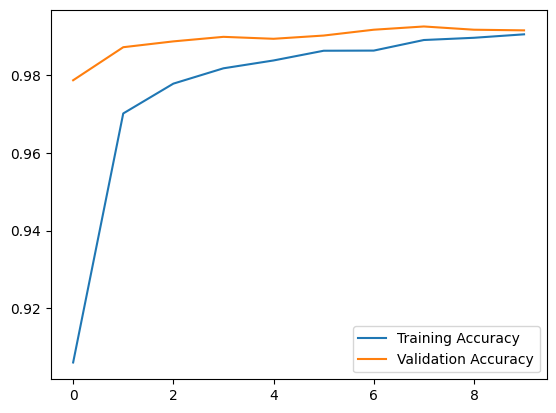

In [10]:
#Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


Saving the trained CNN model for future predictions.


In [11]:
#Save Model
model.save("handwritten_character_model.keras")


## Conclusion

In this project, a Convolutional Neural Network (CNN) was successfully implemented
to recognize handwritten digits using the MNIST dataset.

The model achieved high accuracy on the test dataset, demonstrating its effectiveness
in learning visual patterns from handwritten images.

This project provided hands-on experience with image preprocessing, CNN architecture,
model training, and evaluation. The trained model can be further extended to recognize
handwritten characters or complete words using advanced deep learning techniques.
